
# Project: Investigate the movie data set - [TMDb movie data]


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id="intro"></a>
# Introduction
This dataset contains roughly 10,000 movies The Movie Database (TMDb)

### Research Question 1: Is there a relation between movie popularity and budget spent?
### Research Question 2: Is there a relation between movie runtime and popularity?


### Column description:
id: unique identifying number for each movie

imdb_id: unique identifying number for each movie on IMDB website

popularity: popularity for each movie in the data set

budget: Budget spent on a movie's production

revenue: Revenue gathered from a movie after release

original_title: Title of the movie

cast: Cast of actors in the movie

homepage: Webpage link

director: Director of the movie

tagline: Tagline for the movie

keywords: Keywords for the movie

overview: Overview for the movie

runtime: Run times for movie

genres: Genres of movies

production_companies: Companie that created the movie

release_date: Release date of the movie (m/d/y)

vote_count: Vote count of the movie

vote_average: Vote average of the movie

release_year: Release year of a movie

budget_adj: Budget of the movie in terms of 2010 dollars, accounting for inflation over time.

revenue_adj: Revenue of the movie in terms of 2010 dollars, accounting for inflation over time.

In the cell below, potentially necessary packages were imported in order to carry out this analysis.

In [3]:
#In the cell below, potentially necessary packages were imported in order to carry out this analysis.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [4]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In the cell below i installed an upgrade for numpy

In [5]:
# Upgrade numpy in order for the df.head() function to run properly
!pip install numpy==1.16.5

<a id="wrangling"></a>
# Data Wrangling

In the cell below I wrote a peice of code in order to import the tmdb movie data set to begin working on wrangling by placing it into a dataframe.

In [6]:
# I imported the tmdb movie data set
df = pd.read_csv('tmdb-movies.csv')

I first checked if the data was imported correctly by ''printing'' out the first few rows.

In [7]:
# I got the first few rows to check if the data was imported correctly with df.head().
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Then in the following cell i also checked the last few rows were to see if there is any apparent missing data that needs to be adressed before analysis is done.

In [8]:
# I checked the last few rows to see if there is any apparent missing data using df.tail(). 
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


From the cell above we can see that there 0 values present in multiple areas within our data set. So in the cell below we wanted to see the rows with 0-values in a small table.

In [9]:
# The rows with 0-values in a small table were printed out in a small table
df[df.runtime == 0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.000000e+00,0.0
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,...,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/15,15,5.6,2015,0.000000e+00,0.0
445,353345,tt3800796,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,NaN,Steven R. Monroe,NaN,...,Taking place years after The Haunting of Molly...,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.000000e+00,0.0
486,333653,tt4058368,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,NaN,Nancy Savoca,NaN,...,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015,0.000000e+00,0.0
595,341051,tt2914740,0.028725,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,http://deepdarkmovie.com,Michael Medaglia,NaN,...,Fantasy - A failed sculptor discovers a strang...,0,Horror,NaN,1/1/15,11,4.6,2015,0.000000e+00,0.0
616,325843,tt4333210,0.026797,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,NaN,Michael Goldfine,NaN,...,The film follows a trio of varsity baseball pl...,0,Drama|Comedy,NaN,11/10/15,20,6.6,2015,0.000000e+00,0.0
1241,296370,tt3024964,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,NaN,NaN,...,DANCE-OFF is a tongue-in-cheek family comedy s...,0,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014,0.000000e+00,0.0
1289,286372,tt1791681,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,http://www.imdb.com/title/tt1791681/,Michael G. Bartlett,No kids allowed,...,A teenage boy discovers the perpetrators of se...,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.4,2014,2.993546e+06,0.0
1293,286256,tt3134058,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,NaN,Mauro Lima,Original language PORTUGUESE,...,"Biopic of Brazilian singer Tim Maia, from his ...",0,Documentary|Drama|Music,Globo Filmes,10/30/14,14,6.0,2014,0.000000e+00,0.0


In the cell below i wanted to see the shape of my dataset to find out how many columns and rows there are

In [10]:
# Got the shape of my data set 
df.shape

(10866, 21)

In the cell below i wanted to see the data types present and if there are any initial indications of missing data

In [11]:
# Got more detailed inormation on my dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Seeing from df.info in the previous cell that there some missing data, i gathered the total number of missing values in the various columns

In [12]:
# Got the sum of all missing values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

## Data Cleaning

In the cell below i began by dropping columns i found to be unnecessary from an initial view of the data set, then i examined the first few rows of the data without the presence of these coluumns

In [13]:
# Unnecessary columns were dropped
df.drop(['id', 'imdb_id', 'homepage', 'director', 'tagline', 'overview', 'production_companies', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)
# Got the first few rows after removal of the columns
df.head()

,popularity,budget,revenue,original_title,cast,keywords,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


After my first step in cleaning the data, i removed all the rows with missing values for me to be able to perform my anaylsis later on. Then i checked the info again to see how much of the data was removed.

In [14]:
# Missing values were dropped from the data set
df.dropna(inplace=True)
# Got the information to check if removal was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9323 entries, 0 to 10865
Data columns (total 12 columns):
popularity        9323 non-null float64
budget            9323 non-null int64
revenue           9323 non-null int64
original_title    9323 non-null object
cast              9323 non-null object
keywords          9323 non-null object
runtime           9323 non-null int64
genres            9323 non-null object
release_date      9323 non-null object
vote_count        9323 non-null int64
vote_average      9323 non-null float64
release_year      9323 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 946.9+ KB


In the cell below i printed out the length of the data set before removing the 0 values

In [15]:
# Length of data set was printed before removing the 0 values
print(len(df))

9323


In the cell below I made a function to check the length of the data before removing the 0 values. Where I put in the 3 columns with 0 values present: runtime, budget, and revenue. Right after doing that, i removed the 0 values and checked again the length of data after removal.

In [21]:
# A function was made to remove the 0 values in the data set.
def zer():
  ''' The function named "zer" removes the 0 values in a neatly fashion
  the global df is brought into the function in order to edit the values inplace
  x: contains all the columns with 0 values under the local variable x
  a for loop is placed inside the formula to remove the 0 in each column inputed
  This is a void function therefore a "return" is not needed at the end '''
  global df
  x=['budget','revenue','runtime']
  for n in range(len(x)):
    df = df[df[x[n]] != 0]
  print('0s are removed')

In the cell below i called my function to see if the changes were made. Changes being removing the 0 values

In [22]:
# Got length of data set after removing 0 values
zer()

0s are removed


Then in the following cell i checked again the last few rows which showed some of the 0 values to double check if they are gone

In [23]:
# Got the last few rows to make sure the 0 values are gone
df.tail()

,popularity,budget,revenue,original_title,cast,keywords,runtime,genres,release_date,vote_count,vote_average,release_year
10822,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,alcohol|adultery|professor|married couple|son,131,Drama,6/21/66,74,7.5,1966
10828,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,cold war|east germany,128,Mystery|Thriller,7/13/66,46,6.3,1966
10829,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,sheriff|ranch|liquor|settler|revolver,120,Action|Western,12/17/66,36,6.9,1966
10835,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,missionary|china|us navy|chinese|battle,182,Action|Adventure|Drama|War|Romance,12/20/66,28,7.0,1966
10848,0.207257,5115000,12000000,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,submarine|coma|claustrophobia|wound|laser,100,Adventure|Science Fiction,8/24/66,42,6.7,1966


<a id="eda"></a>
# Exploratory Data Analysis


### Research Question 1 (Is there a relation between movie popularity and budget spent?)

Below i got the different histograms in my dataset to see the filtered data visualised

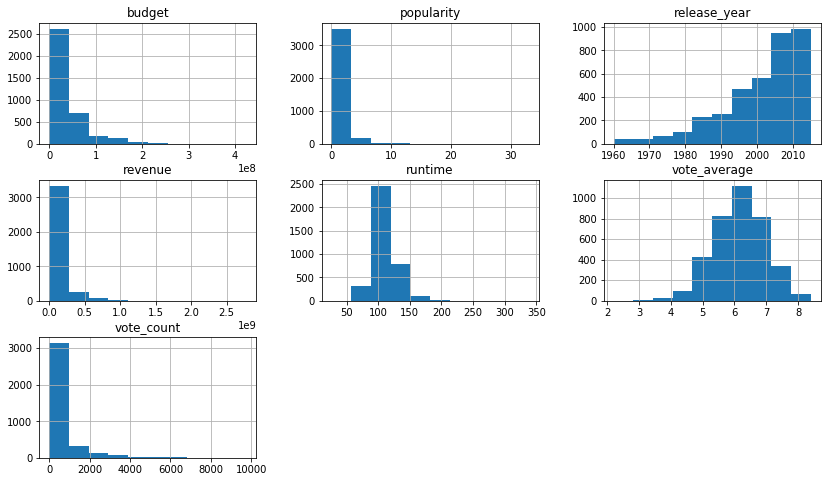

In [24]:
# Histograms were made for the cleaned data set
df.hist(figsize=(14,8));

In the cell below i got the average of the budget spent on movies.

In [25]:
# i made a variable 'x' and put a function inside it to get the average of the budget spent on movies.
x = float(df['budget'].mean())
x

37796705.3812601

In the following cells i made 2 variables, the h_budget is movies that has a higher or equal to the average amount spent and the l_budget are movies with below average of budget spent on movie production. I did this to see if the movies' popularity differs on movies with high budgets compared to lower budget movies.

In [26]:
# I made 2 small dataframes in the cell below, and i assigned 2 variables for the higher than average budget movies (h_budget) and the lower than average budget movies (l_budget)
h_budget = df.query("budget >= 37796705.3812601")
l_budget = df.query('budget < 37796705.3812601')

In the cell below i made a variable 'y' and put in it a function to get the average popularity of movies with budget spent on it is higher than the average budget spent 

In [27]:
# I put the average popularity in the higher budget movies in variable 'y'
y = h_budget.mean().popularity

In [28]:
# the value of variable 'y' is printed out
y

1.8285990174326463

In the cell below i made a variable 'l' and put in it a function to get the average popularity of movies with budget spent on it is lower than the average budget spent 

In [29]:
# I put the value of the average popularity in movies with lower than average budget spent inside variable 'l'
l = l_budget.mean().popularity

In [30]:
# the value of variable 'l' is printed out
l

0.9013266349918432

Below a scatter plot was made to see if there is a correlation between budget spent and movie popularity. From this scatter graph we can see that there is a positive correlation when comparing these two data columns, therefore movies with a higher budget spent tend to be more popular.

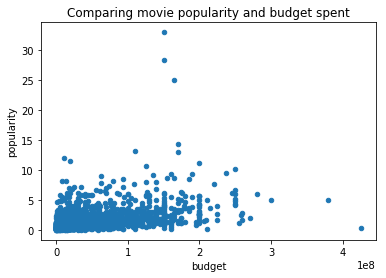

In [31]:
# a scatter plot is made to check if there is a link between budget spent on a movie and it's popularity
df.plot(x='budget', y='popularity', title='Comparing movie popularity and budget spent', kind='scatter');

### Research Question 2  (Is there a relation between movie runtime and popularity?)

First i started working on finding the answer to the second question by getting the average of movie runtime in my dataset

In [32]:
# i put the value of average movie runtime inside the variable c
c = df['runtime'].mean()
c

109.44749596122779

In the following cells i made 2 variables, the h_runt are movies that have a higher or equal to the average movie runtime and the l_runtime are movies with below average of movie runtime. I did this to see if the length of a movie affects it's popularity.

In [33]:
# I got the higher than average runtime in between 105 minutes and 200 minutes and put it in the variable 'h_runt'
h_runt = df.query('105 <= runtime <= 200')
# I got the lower than average runtime in between 70 and 200 and put it in the variable 'l_runt'
l_runt = df.query('70 <= runtime <= 200')

In [34]:
# I got the popularity of the movies with higher than average runtime
h_runt.mean().popularity

1.4488655373210633

In [35]:
# I got the popularity of the movies with lower than average runtime
l_runt.mean().popularity

1.2165590891891889

Below 2 scatter plots were made to see if there is a correlation between movie runtime and popularity. From the 1st graph using the lower than average runtime we can see that as movie runtime increase then so does popularity. Then a following scatter plot using higher than average runtime, here we can see a continuing increase in popularity up to a certain extent. So we can conclude that there is a positive correlation when comparing these two data columns, therefore movies with a higher runtime, to a certain extent, tend to be more popular.

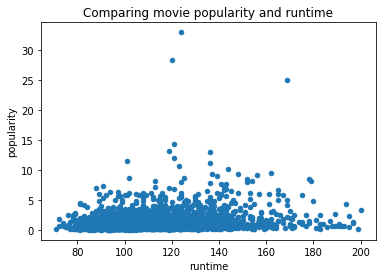

In [36]:
# A scatter plot was made to check the relation between a movie's runtime when it's below average and it's popularity
l_runt.plot(x='runtime', y='popularity', title='Comparing movie popularity and runtime', kind='scatter');

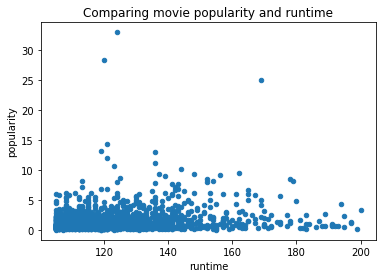

In [37]:
# A scatter plot was made to check the relation between a movie's runtime when it's higher than average and it's popularity
h_runt.plot(x='runtime', y='popularity', title='Comparing movie popularity and runtime', kind='scatter');

From the 2 scatter plotes made in the cells above we can conclude that as movie's runtime increase to about 200 minutes maximum then so does it's popularity increase

<a id="conclusions"></a>
# Conclusion

From the brief analysis performed we saw that several factors affect a movie's popularity. I attempted to analyze some of these factors and see if there is in fact a relation. First the data was cleaned and trimmed, and unecessary column values were removed.

### Data limitations
1. Many NAN values were removed, instead of finding their values from online sources

2. Movie cunsumption nowadays is vastly different from when this dataset was made. Nowadays there  are many streaming websites for movies, such as netflix for example, where some people wait for movies to be placed on that site to watch instead of paying for movie tickets and leaving their home. So maybe the data can improved upon by including movies watched on those websites.

3. Many of the columns present originally in the dataset were irrelevant to our analysis 

### Insights from our cleaned data

1. amount of money spent on a movie's production does make a difference on it's popularity.
2. movies with a higher than average runtime tends to be more popular

In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_the_TMDb_movie_data_set.ipynb'])

0